In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modelling


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [8]:
df = pd.read_csv(r"c:\Users\MI\Downloads\stud.csv")

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
x = df.drop(columns=['math_score'],axis = 1)

In [13]:
y = df['math_score']

In [14]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [15]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [19]:
#create column tranformers with 3 types of transformer 
num_features = x.select_dtypes(exclude='object').columns
cat_features=  x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("standardscaler",numeric_transformer,num_features,)
    ]
)
    


In [22]:
x = preprocessor.fit_transform(x)

In [23]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [25]:
# seprate train and test data 
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test =train_test_split(x, y,train_size=.2,random_state = 42)

In [27]:
x_train.shape
x_test.shape

(800, 19)

In [36]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true,predicted)
    rsme= np.sqrt(mean_squared_error(true,predicted))
    r2_square= r2_score(true,predicted)
    return mae,rsme,r2_square,mse
    
                  

In [39]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor": AdaBoostRegressor()
}

model_list = []
r2list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    #make prdictions

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    

    model_train_mae, model_train_rsme, model_train_r2, _ = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rsme, model_test_r2, _ = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print ("model performance for traning set")
    print("-root mean squared error:{:.4f}".format(model_train_rsme))
    print("-mean absolute error:{:.4f}".format(model_train_mae))
    print("-r2 score:{:.4f}".format(model_train_r2))

    print ("-----------------------------------------------")

    print('model performance for test set ')

    print("-root mean squared error:{:.4f}".format(model_test_rsme))
    print("-mean absolute error:{:.4f}".format(model_test_mae))
    print("-r2 score:{:.4f}".format(model_test_r2))
    r2list.append(model_test_r2)

    print ('='*35)
    print('/n')









LinearRegression
model performance for traning set
-root mean squared error:4.9901
-mean absolute error:3.9809
-r2 score:0.8870
-----------------------------------------------
model performance for test set 
-root mean squared error:5.5258
-mean absolute error:4.4065
-r2 score:0.8683
/n
Ridge
model performance for traning set
-root mean squared error:4.9942
-mean absolute error:3.9777
-r2 score:0.8868
-----------------------------------------------
model performance for test set 
-root mean squared error:5.5178
-mean absolute error:4.3915
-r2 score:0.8687
/n
Lasso
model performance for traning set
-root mean squared error:6.4813
-mean absolute error:5.0883
-r2 score:0.8094
-----------------------------------------------
model performance for test set 
-root mean squared error:6.7498
-mean absolute error:5.3471
-r2 score:0.8036
/n


c:\krishsir_project\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\krishsir_project\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KNeighborsRegressor
model performance for traning set
-root mean squared error:5.9224
-mean absolute error:4.6450
-r2 score:0.8409
-----------------------------------------------
model performance for test set 
-root mean squared error:7.8106
-mean absolute error:6.2420
-r2 score:0.7370
/n
DecisionTreeRegressor
model performance for traning set
-root mean squared error:0.2500
-mean absolute error:0.0250
-r2 score:0.9997
-----------------------------------------------
model performance for test set 
-root mean squared error:8.5039
-mean absolute error:6.6162
-r2 score:0.6882
/n
RandomForestRegressor
model performance for traning set
-root mean squared error:2.5365
-mean absolute error:2.0276
-r2 score:0.9708
-----------------------------------------------
model performance for test set 
-root mean squared error:6.5186
-mean absolute error:5.0949
-r2 score:0.8168
/n
XGBRegressor
model performance for traning set
-root mean squared error:0.2538
-mean absolute error:0.0525
-r2 score:0.9997

In [40]:
pd.DataFrame(list(zip(model_list,r2list)),columns=['model_name','r2_score']).sort_values(by=["r2_score"],ascending=False)

,model_name,r2_score
1,Ridge,0.868726
0,LinearRegression,0.868345
7,CatBoostRegressor,0.818033
5,RandomForestRegressor,0.816789
2,Lasso,0.803563
8,AdaBoostRegressor,0.792416
6,XGBRegressor,0.754930
3,KNeighborsRegressor,0.736966
4,DecisionTreeRegressor,0.688200


linnear regression

In [41]:
lin_model = LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("accuracy of model is %.2f" %score)

accuracy of model is 86.83


plot y_pred and y_test

Text(0, 0.5, 'predicted')

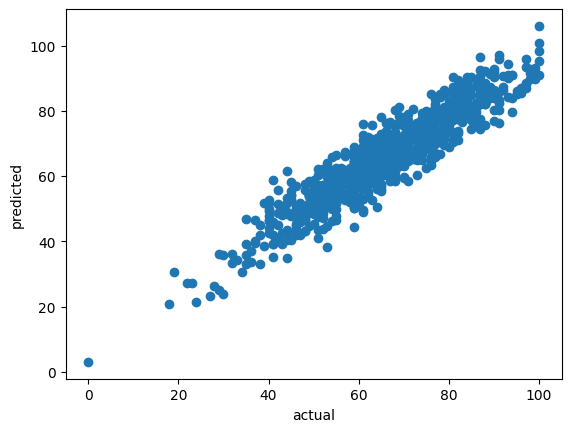

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')

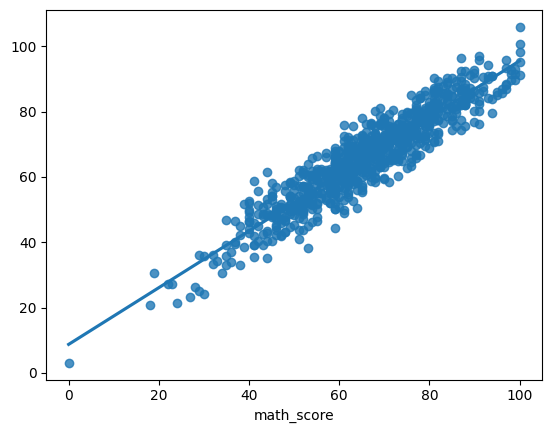

In [46]:
sns.regplot(x=y_test, y=y_pred,ci = None,);

difference between actal and predicted 

In [47]:
pred_df =pd.DataFrame({'actual_value': y_test,'pred_value': y_pred,'difference': y_test-y_pred})

In [48]:
pred_df

,actual_value,pred_value,difference
521,91,76.312627,14.687373
737,53,59.875190,-6.875190
740,80,77.421754,2.578246
660,74,77.922153,-3.922153
411,84,88.354792,-4.354792
...,...,...,...
619,65,67.607378,-2.607378
855,97,88.482397,8.517603
803,82,81.358974,0.641026
645,65,70.027290,-5.027290
